In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Jacky\anaconda3\envs\test_scvi16_cuda113\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# 加载数据
data = pd.read_csv('Feature_selection.txt', sep='\t')

In [3]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [4]:
def feature_importances_with_random_forest(data, target):
    """
    Calculate and display feature importances using a Random Forest classifier.

    :param data: Pandas DataFrame containing features and target.
    :param target: The target variable column name.
    :return: Pandas Series containing feature importances.
    """
    # 分离特征和目标变量
    X = data.drop([target, 'ENSG_IDs'], axis=1)  # 假设'Sample_ID'是非特征列
    y = data[target]

    # 创建并训练随机森林模型
    rf = RandomForestClassifier(n_estimators=999, random_state=666)
    rf.fit(X, y)

    # 获取特征重要性
    importances = rf.feature_importances_

    # 将特征重要性转换为Pandas Series以便于显示
    feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    return feature_importances

In [5]:
target = 'Label'

In [6]:
# 计算特征重要性
feature_importances = feature_importances_with_random_forest(data, target)
print(feature_importances)

ValueError: could not convert string to float: 'Foxp3+ Tex'

In [9]:
feature_importances.to_excel('随机森林_feature_importance.xlsx')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.utils.data as Data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

In [3]:
df = pd.read_csv('train.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(2597, 45)

In [4]:
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(2597, 54)

In [5]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,Label,pMT,CCDC61,CTLA4,CCDC141,HAVCR2,FBXO2,ZNF518B,TIRAP,DNAJC16,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK-like,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,1,0.799148,-0.035959,2.421835,-0.110507,-0.282115,-0.023752,-0.088064,-0.084541,-0.082665,...,1,0,0,0,0,0,0,1,0,0
1,0,0.518135,-0.034200,-0.646000,-0.102000,-0.246000,-0.024800,-0.083300,-0.084000,-0.089000,...,1,0,1,0,0,0,0,0,0,0
2,0,0.243902,-0.036178,-0.315234,-0.075059,-0.111236,-0.037289,-0.086717,-0.070800,-0.084486,...,0,0,1,0,0,0,0,0,0,0
3,1,1.879284,-0.157000,2.350000,-0.316000,5.360000,-0.110000,-0.183000,-0.254000,-0.226000,...,1,0,0,0,0,0,0,0,0,1
4,0,0.524934,-0.036972,-0.406209,-0.084510,-0.142795,-0.036377,-0.098418,-0.070376,-0.077170,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,0,4.445621,5.290000,4.970000,5.060000,-0.351000,-0.264000,-0.218000,-0.186000,-0.173000,...,1,0,0,0,0,0,1,0,0,0
2593,1,1.218162,-0.101225,3.549685,-0.138230,-0.079014,-0.060694,-0.163732,-0.051899,-0.110285,...,0,0,1,0,0,0,0,0,0,0
2594,0,1.901294,-0.054627,-0.193895,-0.110121,-0.057698,-0.058117,-0.132398,-0.028240,-0.063090,...,0,0,0,0,0,0,0,0,1,0
2595,1,1.515029,-0.547508,-0.990123,-0.282908,-0.738703,-0.141124,-0.250231,-0.156994,-0.379837,...,0,0,0,0,1,0,0,0,0,0


In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2077, 53) (520, 53) (2077,) (520,)


In [7]:
X_train = X_train.values
X_test  = X_test.values
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [8]:
#数据的形状调整和类型转换，以便它们可以被用于PyTorch框架中的深度学习模型训练和测试
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)
X_train = torch.tensor(X_train,dtype = torch.float)
Y_train  = torch.tensor(Y_train,dtype = torch.float)
X_test = torch.tensor(X_test,dtype = torch.float)
Y_test  = torch.tensor(Y_test,dtype = torch.float)
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

torch.Size([2077, 1, 53]) torch.Size([2077]) torch.Size([520, 1, 53]) torch.Size([520])


In [9]:
train_loader = Data.DataLoader(
    dataset=Data.TensorDataset(X_train, Y_train),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
    batch_size=55,  # 每块的大小
    shuffle=True,  # 要不要打乱数据 (打乱比较好)
    drop_last =True, #丢弃最后一组数据
    num_workers=0,  # 多进程（multiprocess）来读数据
)
test_loader = Data.DataLoader(
    dataset=Data.TensorDataset(X_test, Y_test),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
    batch_size=50,  # 每块的大小
    shuffle=True,  # 要不要打乱数据 (打乱比较好)
    drop_last =True, 
    num_workers=0,  # 多进程（multiprocess）来读数据
)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class TransformerEncoderLayerWithResidual(nn.Module):
    def __init__(self, hidden_dim, num_heads):
        super(TransformerEncoderLayerWithResidual, self).__init__()
        self.self_attn = nn.MultiheadAttention(hidden_dim, num_heads)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, src):
        src2 = self.norm1(src)

        src2 = src + self.dropout(self.self_attn(src2, src2, src2)[0])
        src2 = self.norm2(src2)
        src = src + self.dropout(self.linear(src2))
        return src
def seed_torch():
    seed=666
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
class TransformerRegressor(nn.Module):
    def __init__(self, input_size,input_dim, hidden_dim, num_layers, num_heads, output_dim):
        super(TransformerRegressor, self).__init__()
        self.cnn    = nn.Conv1d(input_size,232,kernel_size = 3,padding=1)
        self.layers = nn.ModuleList([TransformerEncoderLayerWithResidual(hidden_dim, num_heads) for _ in range(num_layers)])
        self.fc0 = nn.Linear(input_size, 232)
        self.fc1 = nn.Linear(232 + 232, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
#         print(input_x.shape)
        x1 = self.cnn(x.transpose(2,1))
        x1 = x1.transpose(2,1)
        x1 = self.dropout(x1)
        for layer in self.layers:
            x = layer(self.fc0(x))
#         print(x.shape,x1.shape)
        x = torch.cat([x,x1],axis = -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
#         print(x.shape)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
#         print(x.shape)
        x = torch.squeeze(x)
#         print(x.shape)
        x = torch.sigmoid(x)
#         print('------------')
        return x

In [11]:
import gc
# Example usage
input_size = 53
input_dim  = 232
hidden_dim = 232
num_layers = 1
num_heads = 8
output_dim = 1
Epochs = 99
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_torch()

model = TransformerRegressor(input_size,input_dim, hidden_dim, num_layers, num_heads, output_dim)

model = model.to(device)

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00026)  # 优化器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.86)

model.train()

loss_dict =  {}
loss_dict['train_loss'] = []
loss_dict['test_loss'] = []
AUC= 0
LOSS_TEST = 10
Len_train = len(train_loader)
Len_test = len(test_loader)
for epochs in range(Epochs):
    loss_mean_train = 0
    loss_mean_test = 0
    acc_train = 0
    acc_test = 0
    auc_train = 0
    auc_test = 0
    model.train()
    for data_l in train_loader:
        seq, labels = data_l
        seq, labels = seq.to(device), labels.to(device)
        optimizer.zero_grad()                          #    清空过往梯度 
        y_pred1 = model(seq)
        single_loss = loss_function(y_pred1, labels)    #    获取loss：输入预测值和标签，计算损失函数
        single_loss.backward()                         #    反向传播，计算当前梯度
        optimizer.step()                               #    根据梯度更新网络参数
        loss_mean_train += single_loss.item()
    scheduler.step()
    loss_mean_train = loss_mean_train/Len_train
    loss_dict['train_loss'].append(loss_mean_train)
    model.eval()
    for data_s in test_loader:
        seq, labels = data_s
        seq, labels = seq.to(device), labels.to(device)
        y_pred1 = model(seq)
        single_loss = loss_function(y_pred1, labels)    #    获取loss：输入预测值和标签，计算损失函数
#         single_loss = single_loss1
        loss_mean_test += single_loss.item()
    loss_mean_test = loss_mean_test/Len_test
    loss_dict['test_loss'].append(loss_mean_test)
    print('Epochs',epochs,'loss_train',round(loss_mean_train,5),'loss_test',round(loss_mean_test,5),)
    print('------------------')
    if LOSS_TEST > loss_mean_test:
        LOSS_TEST =loss_mean_test
        torch.save(model, 'model_3.pth')
        print('已更新保存模型')
    del seq, labels #删除数据与变量
    gc.collect() #清除数据与变量相关的缓存
    torch.cuda.empty_cache() #缓存分配器分配出去的内存给释放掉

Epochs 0 loss_train 0.47515 loss_test 0.40271
------------------
已更新保存模型
Epochs 1 loss_train 0.34852 loss_test 0.3758
------------------
已更新保存模型
Epochs 2 loss_train 0.2994 loss_test 0.31958
------------------
已更新保存模型
Epochs 3 loss_train 0.25732 loss_test 0.29667
------------------
已更新保存模型
Epochs 4 loss_train 0.22597 loss_test 0.29853
------------------
Epochs 5 loss_train 0.22384 loss_test 0.30192
------------------
Epochs 6 loss_train 0.22223 loss_test 0.25665
------------------
已更新保存模型
Epochs 7 loss_train 0.20248 loss_test 0.27359
------------------
Epochs 8 loss_train 0.17521 loss_test 0.28103
------------------
Epochs 9 loss_train 0.17799 loss_test 0.27529
------------------
Epochs 10 loss_train 0.16934 loss_test 0.28511
------------------
Epochs 11 loss_train 0.17007 loss_test 0.28739
------------------
Epochs 12 loss_train 0.16707 loss_test 0.27418
------------------
Epochs 13 loss_train 0.15499 loss_test 0.27751
------------------
Epochs 14 loss_train 0.15563 loss_test 0.27639
-

In [12]:
from sklearn.metrics import f1_score,recall_score,precision_score,roc_curve,roc_auc_score,accuracy_score,confusion_matrix,r2_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('model_3.pth')
model = model.to(device)
Y = Y_test.cpu().detach().numpy()
yhat = model(X_test.to(device))
yhat = yhat.cpu().detach().numpy()

FPR,recall,thresholds = roc_curve(Y,yhat,pos_label=1)
area =roc_auc_score(Y,yhat)
maxindex = (recall-FPR).tolist().index(max(recall-FPR))
recall[maxindex]
# 通过最佳阈值来获取预测结果

0.8672566371681416

In [13]:
thresholds[maxindex]

0.4567655

In [15]:
fixed_threshold = 0.7306864

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score

# 设置KFold交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# 记录交叉验证的结果
cv_results = {'accuracy': [], 'recall': [], 'precision': [], 'fpr': [], 'tpr': [], 'roc_auc': []}

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = Y_train[train_index], Y_train[val_index]

    # 创建 DataLoader
    train_loader_cv = Data.DataLoader(
        dataset=Data.TensorDataset(X_train_cv, y_train_cv),  
        batch_size=55,
        shuffle=True,
        drop_last=True,
    )
    val_loader_cv = Data.DataLoader(
        dataset=Data.TensorDataset(X_val_cv, y_val_cv),  
        batch_size=50,  
        shuffle=True,
        drop_last=True,
    )

    # 创建模型并进行训练
    model = TransformerRegressor(input_size, input_dim, hidden_dim, num_layers, num_heads, output_dim)
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00026)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.86)

    for epoch in range(Epochs):
        model.train()
        for data_l in train_loader_cv:
            seq, labels = data_l
            seq, labels = seq.to(device), labels.to(device)
            optimizer.zero_grad()
            y_pred1 = model(seq)
            single_loss = loss_function(y_pred1, labels)
            single_loss.backward()
            optimizer.step()
        
        scheduler.step()

    # 验证模型
    model.eval()
    y_pred_val = []
    y_true_val = []
    for data_s in val_loader_cv:
        seq, labels = data_s
        seq, labels = seq.to(device), labels.to(device)
        y_pred = model(seq).cpu().detach().numpy()
        y_true_val.extend(labels.cpu().detach().numpy())
        y_pred_val.extend(y_pred)

    # 转换为数组
    y_pred_val = np.array(y_pred_val)
    y_true_val = np.array(y_true_val)

    # 计算混淆矩阵与指标
    y_pred_binary = (y_pred_val > fixed_threshold).astype(int)
    cm = confusion_matrix(y_true_val, y_pred_binary)
    accuracy = accuracy_score(y_true_val, y_pred_binary)
    recall = recall_score(y_true_val, y_pred_binary)
    precision = precision_score(y_true_val, y_pred_binary)
    fpr = (cm[0, 1]) / (cm[0, 1] + cm[0, 0])
    tpr = recall  # TPR即召回率
    roc_auc = roc_auc_score(y_true_val, y_pred_val)

    # 保存结果
    cv_results['accuracy'].append(accuracy)
    cv_results['recall'].append(recall)
    cv_results['precision'].append(precision)
    cv_results['fpr'].append(fpr)
    cv_results['tpr'].append(tpr)
    cv_results['roc_auc'].append(roc_auc)

# 打印交叉验证结果
cv_df = pd.DataFrame(cv_results)
print(cv_df.mean()) 

accuracy     0.878500
recall       0.814558
precision    0.897223
fpr          0.071506
tpr          0.814558
roc_auc      0.947953
dtype: float64


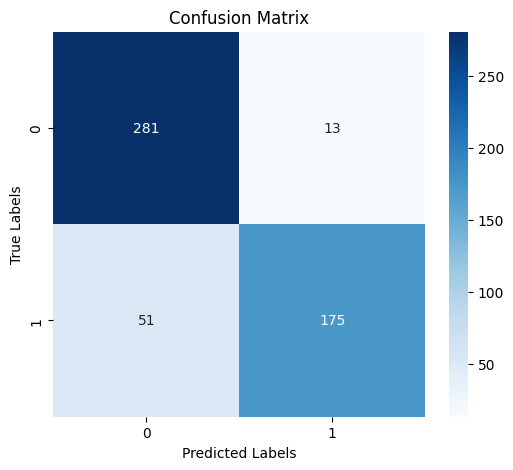

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Predict = [1 if yhat[j] > fixed_threshold else 0 for j in range(len(yhat))]
# 绘制混淆矩阵
cm = confusion_matrix(Y, Predict)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=500)
plt.show()

In [20]:
def evaluate_model_on_data(model, loader, device, fixed_threshold):
    model.eval()
    Y_true = []
    Y_pred = []
    Y_scores = []
    with torch.no_grad():
        for data_s in loader:
            seq, labels = data_s
            seq, labels = seq.to(device), labels.to(device)
            yhat = model(seq)
            Y_true.extend(labels.cpu().numpy())
            Y_pred.extend((yhat > fixed_threshold).cpu().numpy())
            Y_scores.extend(yhat.cpu().numpy())

    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)
    Y_scores = np.array(Y_scores)

    cm, ACC, precision, recall, specificity, F1 = compute_metrics(Y_true, Y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {ACC:.3f}, Precision: {precision:.3f}, Recall (Sensitivity/TPR): {recall:.3f}, Specificity: {specificity:.3f}, F1 Score: {F1:.3f}")

    # Plot ROC and PR curves
    plot_roc_pr_curves(Y_true, Y_scores, fixed_threshold)

    return ACC, precision, recall, specificity, F1, cm

In [22]:
def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ACC = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])  # Sensitivity or TPR
    specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])  # Specificity
    F1 = 2 / (1 / precision + 1 / recall)
    return cm, ACC, precision, recall, specificity, F1

In [24]:
def plot_roc_pr_curves(Y, yhat, fixed_threshold, label='Validation'):
    # ROC curve
    FPR, recall, thresholds = roc_curve(Y, yhat, pos_label=1)
    area = roc_auc_score(Y, yhat)
    plt.figure(figsize=(10, 7))
    plt.plot(FPR, recall, color='blue', label=f'ROC curve (area = {area:.3f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')

    closest_index = (np.abs(np.array(thresholds) - fixed_threshold)).argmin()
    plt.scatter(FPR[closest_index], recall[closest_index], c='black', s=20)
    r = f'{recall[closest_index]:.3f}'
    plt.text(FPR[closest_index] - 0.05, recall[closest_index] + 0.02, r, ha='center', va='bottom', fontsize=10)

    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('Recall', fontsize=15)
    plt.legend(loc='lower right')
    plt.savefig(fname=f"ROC_curve_with_threshold_{label}.svg", dpi=500)
    plt.show()

    # Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(Y, yhat)
    closest_threshold_index = np.argmin(np.abs(thresholds - fixed_threshold))
    closest_precision = precision[closest_threshold_index]
    closest_recall = recall[closest_threshold_index]

    plt.figure(figsize=(8, 7))
    plt.plot(recall, precision, color='blue', label=f'PR Curve ({label})')
    plt.scatter(closest_recall, closest_precision, color='red', label=f'Threshold {fixed_threshold}')
    plt.text(closest_recall, closest_precision, f'({closest_recall:.2f}, {closest_precision:.2f})', fontsize=12, ha='left')

    plt.ylim([0.0, 1.0])
    plt.title('Precision-Recall Curve', fontsize=20)
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.legend(loc='lower left', fontsize=15)
    plt.savefig(fname=f"PR_curve_with_threshold_{label}.svg", dpi=500)
    plt.show()

Confusion Matrix:
[[214  15]
 [ 39 132]]
Accuracy: 0.865, Precision: 0.934, Recall (Sensitivity/TPR): 0.846, Specificity: 0.898, F1 Score: 0.888


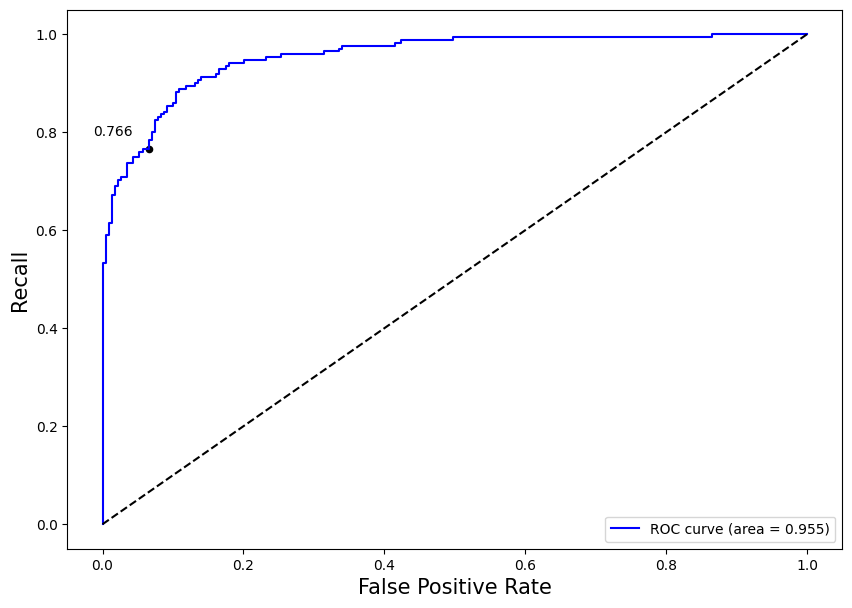

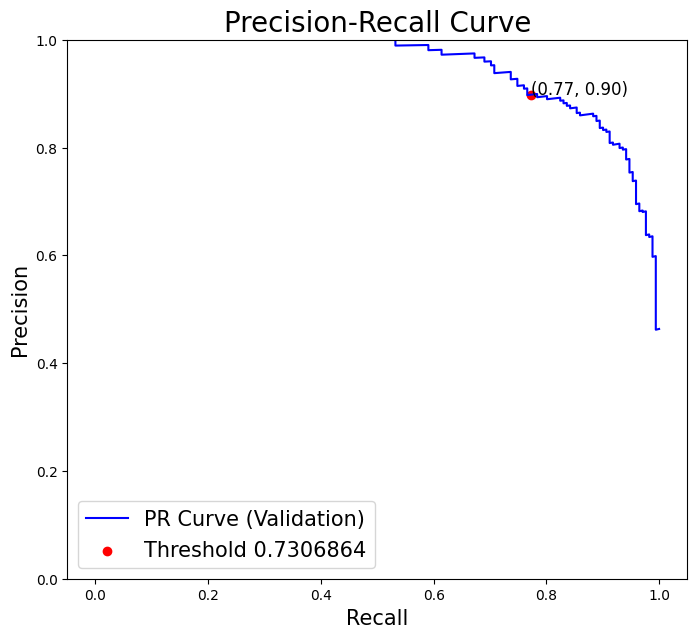

Confusion Matrix:
[[211  11]
 [ 37 141]]
Accuracy: 0.880, Precision: 0.950, Recall (Sensitivity/TPR): 0.851, Specificity: 0.928, F1 Score: 0.898


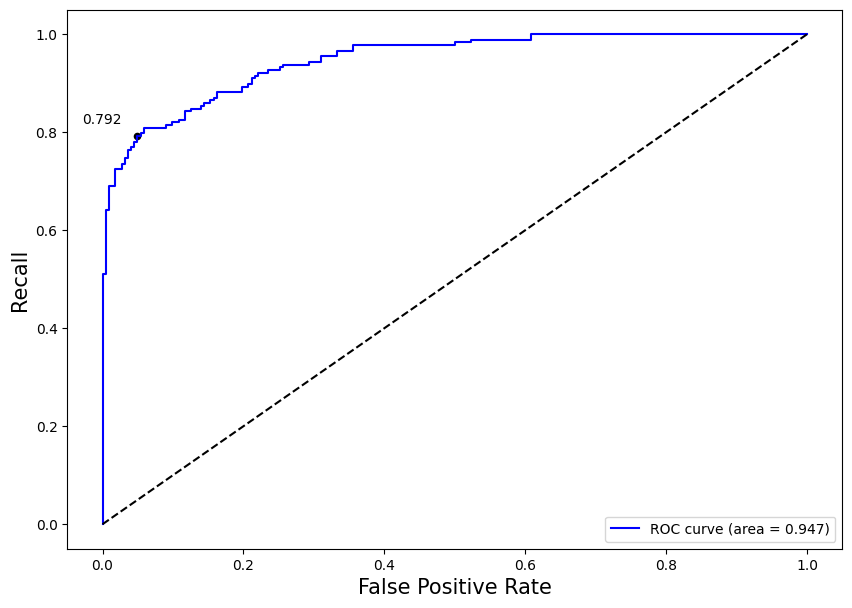

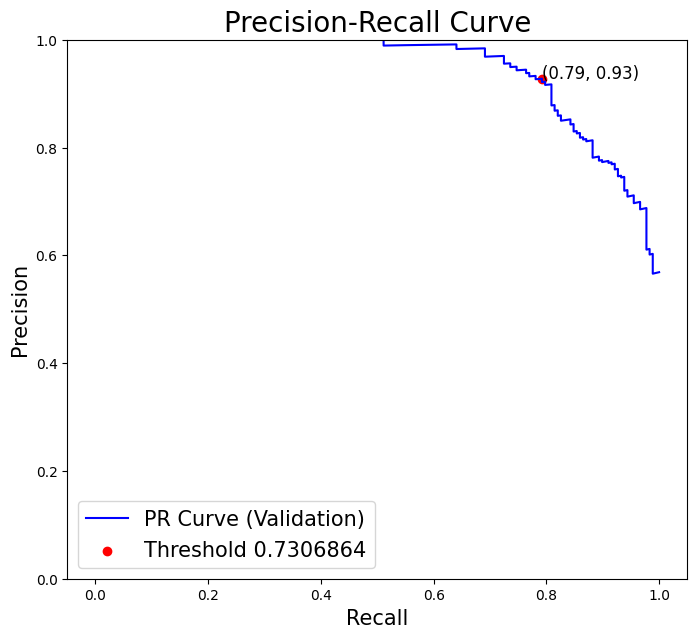

Confusion Matrix:
[[215   6]
 [ 49 130]]
Accuracy: 0.863, Precision: 0.973, Recall (Sensitivity/TPR): 0.814, Specificity: 0.956, F1 Score: 0.887


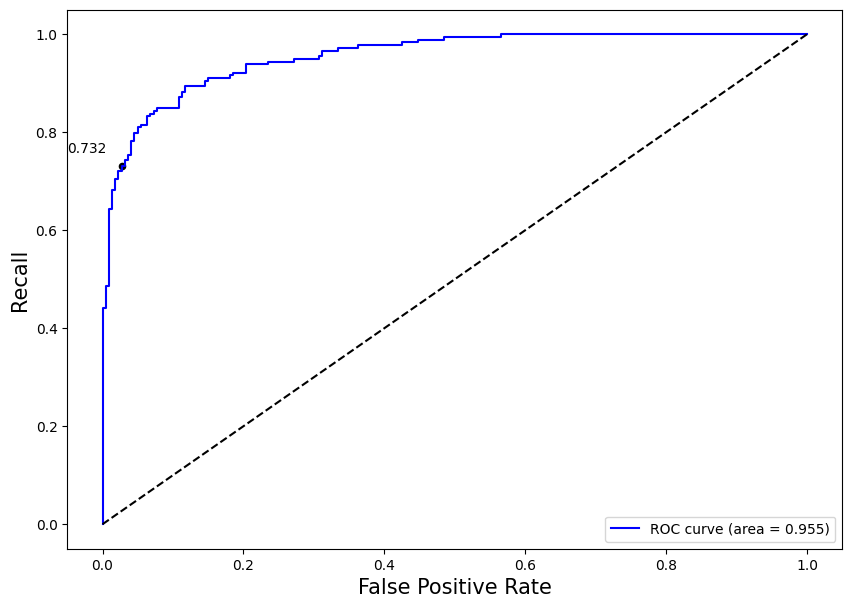

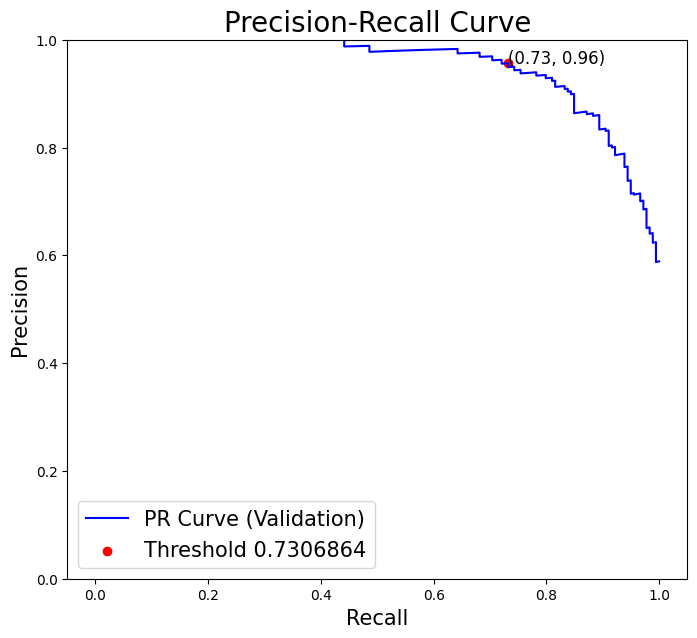

Confusion Matrix:
[[226   6]
 [ 43 125]]
Accuracy: 0.877, Precision: 0.974, Recall (Sensitivity/TPR): 0.840, Specificity: 0.954, F1 Score: 0.902


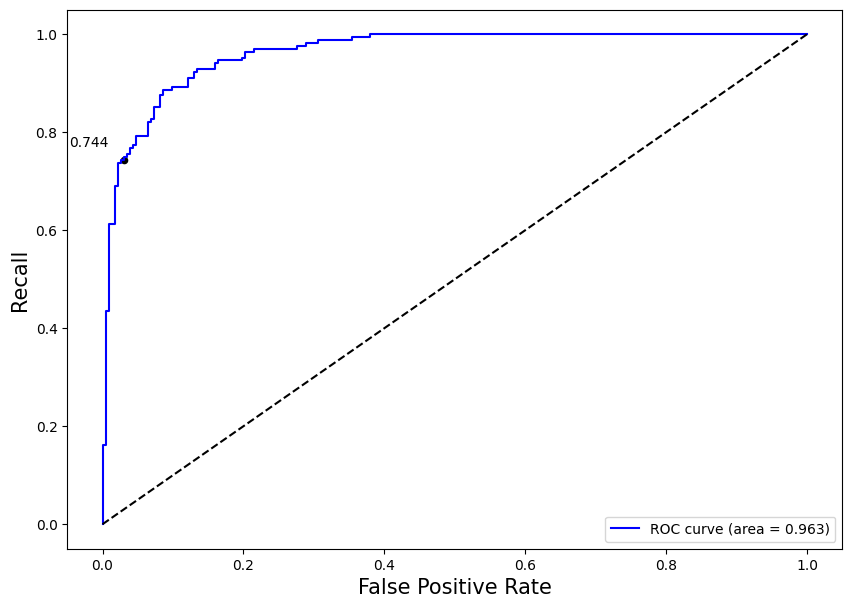

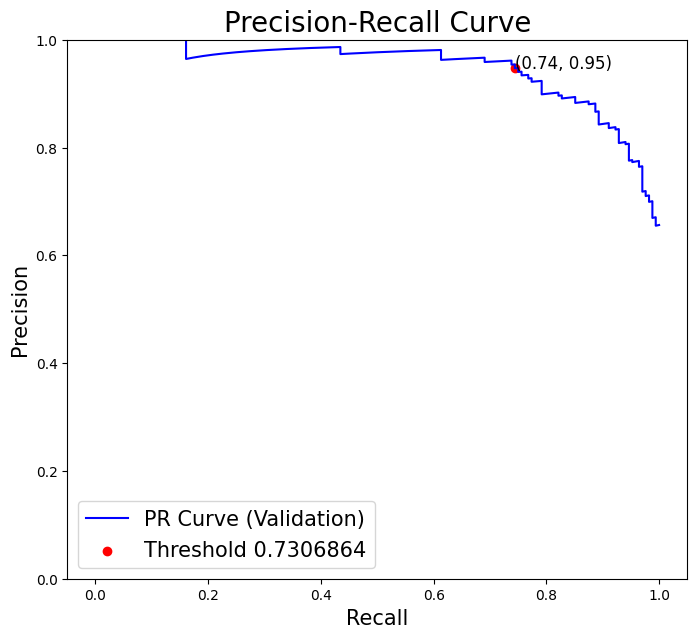

Confusion Matrix:
[[218   3]
 [ 48 131]]
Accuracy: 0.873, Precision: 0.986, Recall (Sensitivity/TPR): 0.820, Specificity: 0.978, F1 Score: 0.895


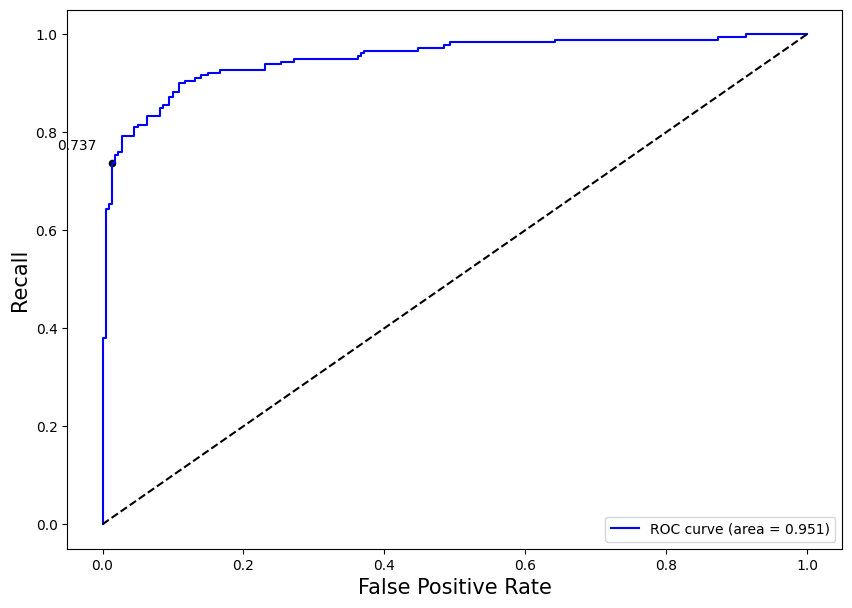

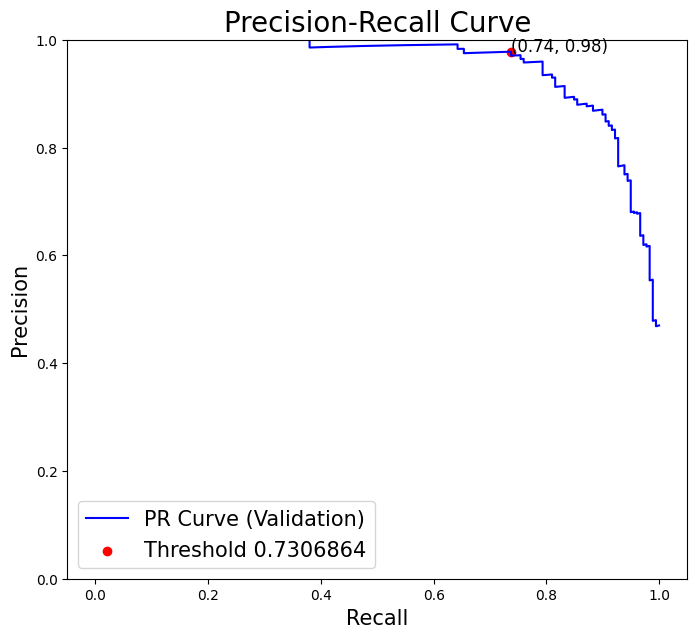

ACC (Avg from CV): 0.871
precision (Avg from CV): 0.964
recall (Avg from CV): 0.834
specificity (Avg from CV): 0.943
F1 (Avg from CV): 0.894


In [26]:
# Cross-validation: Use KFold for cross-validation and compute average metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {
    'ACC': [],
    'precision': [],
    'recall': [],
    'specificity': [],
    'F1': []
}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    train_loader = Data.DataLoader(
        dataset=Data.TensorDataset(X_train_fold, Y_train_fold),
        batch_size=55,
        shuffle=True,
        drop_last=True
    )
    val_loader = Data.DataLoader(
        dataset=Data.TensorDataset(X_val_fold, Y_val_fold),
        batch_size=50,
        shuffle=True,
        drop_last=True
    )

    model = TransformerRegressor(input_size, input_dim, hidden_dim, num_layers, num_heads, output_dim)
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00026)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.86)
    
    for epoch in range(5):  # Reduce number of epochs for cross-validation
        model.train()
        for data_l in train_loader:
            seq, labels = data_l
            seq, labels = seq.to(device), labels.to(device)
            optimizer.zero_grad()
            y_pred1 = model(seq)
            single_loss = loss_function(y_pred1, labels)
            single_loss.backward()
            optimizer.step()
        scheduler.step()

    # Evaluate fold
    fold_metrics = evaluate_model_on_data(model, val_loader, device, fixed_threshold)
    for key, value in zip(cv_metrics.keys(), fold_metrics[:5]):
        cv_metrics[key].append(value)

# Average metrics from cross-validation
for key in cv_metrics.keys():
    print(f'{key} (Avg from CV): {np.mean(cv_metrics[key]):.3f}')

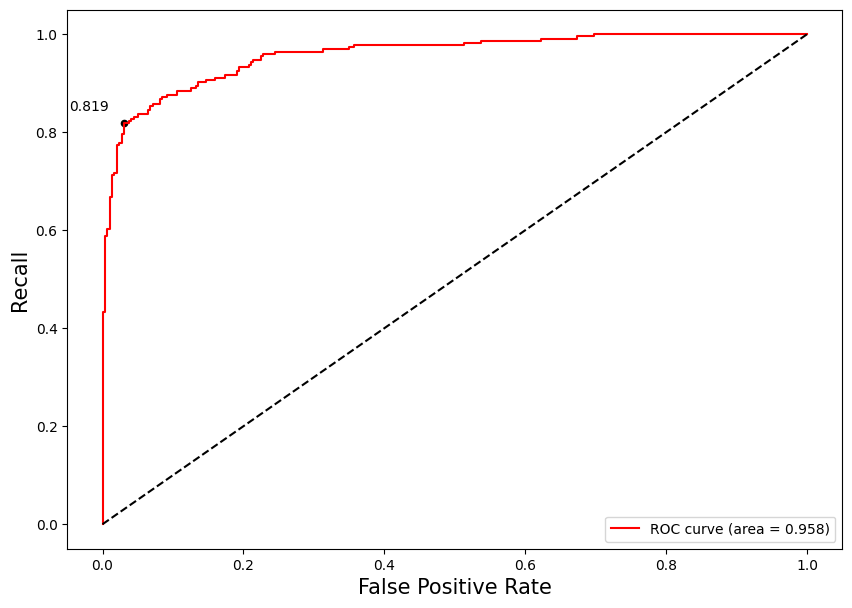

In [15]:
##根据0.8来区分标签
import pandas as pd
import matplotlib.pyplot as plt

# Assuming yhat, FPR, recall, and area are defined in your context

prob = pd.DataFrame(yhat)
fixed_threshold = 0.7306864
prob.loc[prob.iloc[:,0] >= fixed_threshold, 'y_pred'] = 1
prob.loc[prob.iloc[:,0] < fixed_threshold, 'y_pred'] = 0

plt.figure(figsize=(10,7))
plt.plot(FPR, recall, color='red', label='ROC curve (area = %0.3f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Find the index of the closest threshold to 0.8
closest_index = (np.abs(np.array(thresholds) - fixed_threshold)).argmin()
plt.scatter(FPR[closest_index], recall[closest_index], c='black', s=20)
r = '%0.3f' % recall[closest_index]
plt.text(FPR[closest_index] - 0.05, recall[closest_index] + 0.02, r, ha='center', va='bottom', fontsize=10)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('Recall', fontsize=15)
# plt.title('Receiver operating characteristic example', fontsize=20)
plt.legend(loc='lower right')
plt.savefig(fname="ROC_curve_with_threshold_train.svg", dpi=500)
plt.show()

In [16]:
Predict = [1 if yhat[j]>fixed_threshold else 0 for j in range(len(Y)) ]
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R
cm = CM(Y,Predict,labels=[1,0])
ACC= (cm[0,0]+cm[1,1])/cm[:,:].sum()
precision = cm[0,0]/(cm[0,0]+cm[0,1])
recall = cm[0,0]/(cm[0,0]+cm[1,0])
F1 = 2/(1/precision+1/recall)

dict_h = {
    '准确率':ACC,
    '精确度':precision,
    '召回率':recall,
    'F1':F1,
    'area':area,
}
# print(dict_h)
df_h = pd.DataFrame(dict_h,index =[0])
df_h.to_excel('测试集.xlsx')

df_h

,准确率,精确度,召回率,F1,area
0,0.903846,0.818584,0.953608,0.880952,0.95816


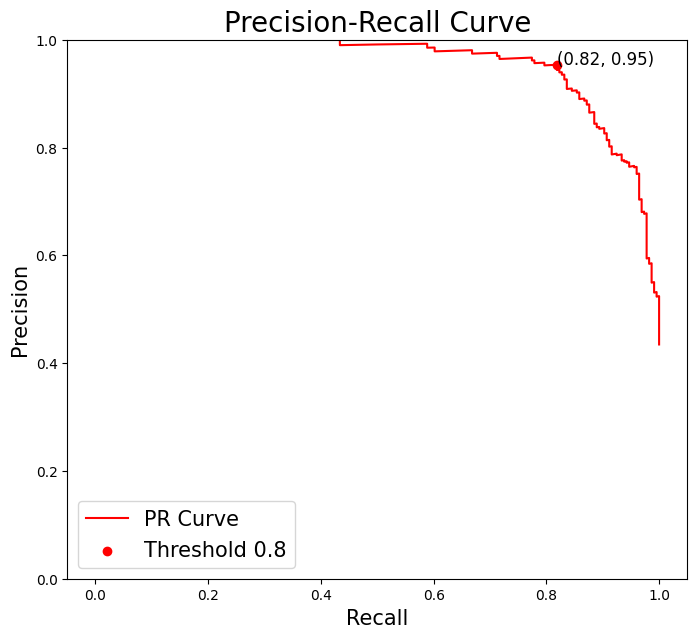

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.metrics import precision_recall_curve

# 计算精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y, yhat)

# 找到最接近阈值0.8的索引
closest_threshold_index = np.argmin(np.abs(thresholds - fixed_threshold))
closest_precision = precision[closest_threshold_index]
closest_recall = recall[closest_threshold_index]

# 绘制精确率-召回率曲线
plt.figure(figsize=(8, 7))
plt.plot(recall, precision, color='red', label='PR Curve')

# 标记阈值0.8对应的点
plt.scatter(closest_recall, closest_precision, color='red', label='Threshold 0.8')

# 添加数值标记
plt.text(closest_recall, closest_precision, f'({closest_recall:.2f}, {closest_precision:.2f})', fontsize=12, ha='left')

# 设置y轴从0开始
plt.ylim([0.0, 1.0])
plt.title('Precision-Recall Curve', fontsize=20)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.legend(loc='lower left', fontsize=15)
plt.savefig(fname="PR_curve_with_threshold_train.svg", dpi=500)
plt.show()
plt.savefig(fname="PR_.jpg", dpi=500)

In [16]:
df = pd.read_csv('validation.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(695, 45)

In [17]:
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(695, 54)

In [18]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,Label,pMT,CCDC61,CTLA4,CCDC141,HAVCR2,FBXO2,ZNF518B,TIRAP,DNAJC16,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK-like,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,1,2.044728,-0.135383,1.114076,-0.203419,-0.538902,-0.193428,-0.216191,-0.144376,-0.160949,...,0,0,0,0,0,0,0,0,0,1
1,1,1.243493,-0.143582,0.998771,-0.213030,-0.627891,-0.218208,-0.212642,-0.145950,-0.173983,...,1,0,0,0,0,0,0,0,0,1
2,1,2.548544,-0.162325,-0.638407,-0.255389,0.692330,-0.230241,-0.244769,-0.182429,-0.185340,...,0,0,0,0,0,0,0,0,0,1
3,1,5.664541,-0.137528,-0.592251,-0.255852,6.130580,-0.169662,-0.262595,-0.189012,-0.145399,...,0,0,0,0,0,0,0,0,0,1
4,1,4.375000,-0.125331,1.329359,-0.198657,-0.364717,-0.145499,-0.237648,-0.154660,-0.138317,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,2.190557,-0.118852,5.169458,-0.165750,-0.350172,-0.107770,-0.135368,-0.206817,-0.173743,...,0,0,0,0,0,0,1,0,0,0
691,0,1.488570,-0.017100,-0.202000,-0.029200,-0.069900,-0.027500,-0.094400,-0.017000,-0.025500,...,0,0,0,0,0,0,1,0,0,0
692,0,2.435784,-0.054770,-0.606645,-0.117646,-0.322527,-0.039641,-0.069225,-0.140544,-0.112297,...,0,0,0,0,0,0,1,0,0,0
693,1,3.302286,-0.072900,2.440000,-0.164000,4.680000,-0.055300,-0.091900,-0.054400,-0.087100,...,0,0,0,0,0,0,0,0,0,1


In [19]:
x = df.iloc[:,1:]
y = df.iloc[:,0].values
y = np.squeeze(y)
x = x.values
x = x.reshape(x.shape[0],1,x.shape[1])
x = torch.tensor(x,dtype = torch.float)

In [20]:
Y = y
yhat = model(x.to(device))
yhat = yhat.cpu().detach().numpy()

FPR,recall,thresholds = roc_curve(Y,yhat,pos_label=1)
area =roc_auc_score(Y,yhat)

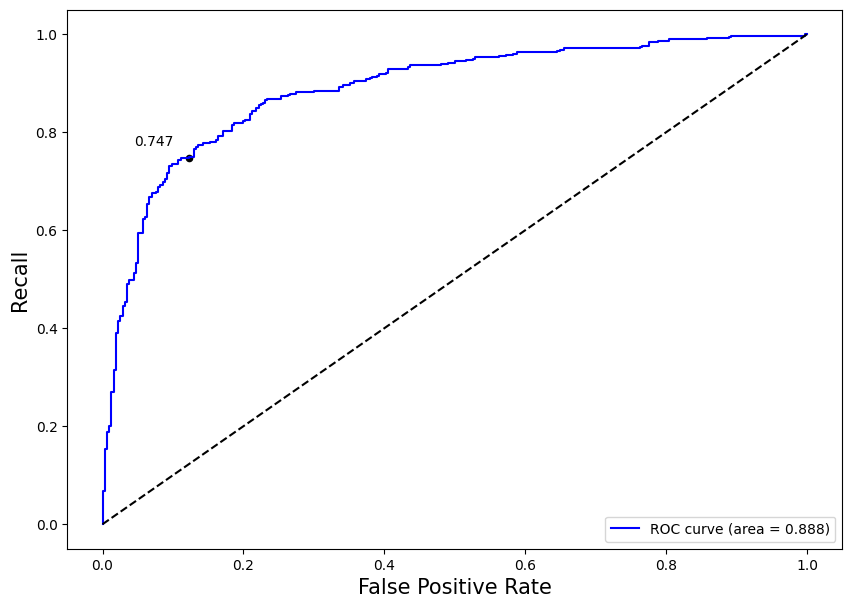

In [21]:
prob = pd.DataFrame(yhat)
fixed_threshold =  0.7306864
prob.loc[prob.iloc[:,0] >= fixed_threshold, 'y_pred'] = 1
prob.loc[prob.iloc[:,0] < fixed_threshold, 'y_pred'] = 0

plt.figure(figsize=(10,7))
plt.plot(FPR, recall, color='blue', label='ROC curve (area = %0.3f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Find the index of the closest threshold to 0.8
closest_index = (np.abs(np.array(thresholds) - fixed_threshold)).argmin()
plt.scatter(FPR[closest_index], recall[closest_index], c='black', s=20)
r = '%0.3f' % recall[closest_index]
plt.text(FPR[closest_index] - 0.05, recall[closest_index] + 0.02, r, ha='center', va='bottom', fontsize=10)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('Recall', fontsize=15)
# plt.title('Receiver operating characteristic example', fontsize=20)
plt.legend(loc='lower right')
plt.savefig(fname="ROC_curve_with_threshold_validation.svg", dpi=500)
plt.show()

In [22]:
Predict = [1 if yhat[j] > fixed_threshold else 0 for j in range(len(Y))]

cm = CM(Y, Predict, labels=[1, 0])
ACC = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
F1 = 2 / (1 / precision + 1 / recall)

dict_h = {
    '准确率': ACC,
    '精确度': precision,
    '召回率': recall,
    'F1': F1,
    'area': area,  # Assuming 'area' is previously defined
}

df_h = pd.DataFrame(dict_h, index=[0])
df_h.to_excel('验证集.xlsx')

df_h

,准确率,精确度,召回率,F1,area
0,0.808633,0.746702,0.884375,0.809728,0.887512


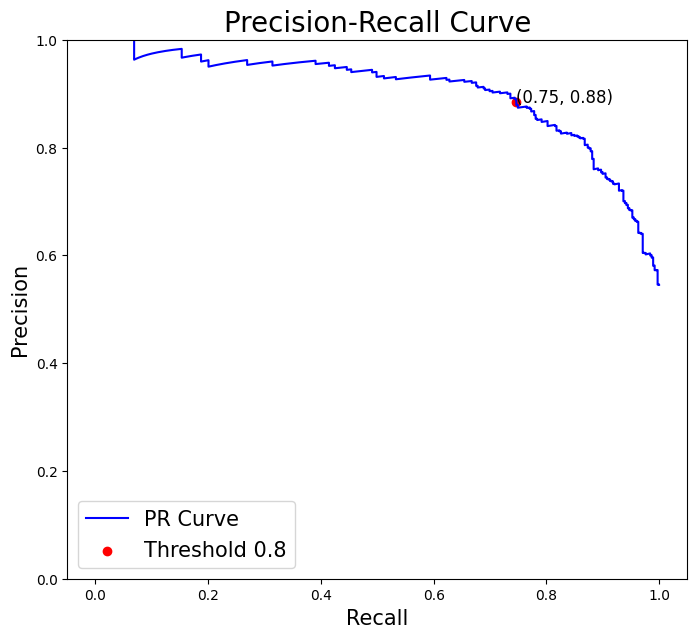

In [23]:
from sklearn.metrics import precision_recall_curve

# 计算精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y, yhat)

# 找到最接近阈值0.8的索引
closest_threshold_index = np.argmin(np.abs(thresholds - fixed_threshold))
closest_precision = precision[closest_threshold_index]
closest_recall = recall[closest_threshold_index]

# 绘制精确率-召回率曲线
plt.figure(figsize=(8, 7))
plt.plot(recall, precision, color='blue', label='PR Curve')

# 标记阈值0.8对应的点
plt.scatter(closest_recall, closest_precision, color='red', label='Threshold 0.8')

# 添加数值标记
plt.text(closest_recall, closest_precision, f'({closest_recall:.2f}, {closest_precision:.2f})', fontsize=12, ha='left')

# 设置y轴从0开始
plt.ylim([0.0, 1.0])
plt.title('Precision-Recall Curve', fontsize=20)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.legend(loc='lower left', fontsize=15)
plt.savefig(fname="PR_curve_with_threshold_validation.svg", dpi=500)
plt.show()

##eLife

In [23]:
df = pd.read_csv('WY20240510.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(9673, 44)

In [24]:
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna()
df.index = range(len(df))
df.shape
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,pMT,FBXO2,DNAJC16,STPG1,VCAM1,LMNA,PUS10,CCDC141,CTLA4,SLC26A6,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,1.711027,-0.280514,-0.234818,-0.214923,-0.325531,2.141155,-0.235670,-0.253964,-0.525659,-0.249793,...,0,0,0,0,0,0,1,0,0,0
1,1.263977,-0.230042,-0.184764,-0.171441,-0.271373,0.852766,-0.195760,-0.212510,-0.444794,-0.207016,...,1,0,1,0,0,0,0,0,0,0
2,0.921942,-0.107408,-0.074278,-0.068927,-0.157166,-0.304935,-0.101143,-0.124218,-0.359833,-0.113993,...,0,0,1,0,0,0,0,0,0,0
3,1.157895,-0.282697,-0.260434,-0.254473,-0.306491,1.183638,-0.268854,-0.279007,-0.405597,-0.275264,...,0,1,0,0,0,0,0,0,0,0
4,0.981595,-0.668358,0.406652,0.624386,-0.897164,2.187865,0.397260,0.404183,-1.602521,0.383591,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9668,1.926927,-0.345781,-0.184554,-0.134758,-0.391295,-1.125315,-0.160073,-0.164038,-0.574151,-0.170189,...,1,0,0,0,0,0,1,0,0,0
9669,6.331126,-0.270208,-0.210913,-0.149093,-0.313992,-0.696077,-0.135292,-0.148679,-0.570780,-0.159062,...,0,0,0,0,0,1,0,0,0,0
9670,1.943005,-0.197725,-0.186501,-0.175786,-0.229098,-0.304555,-0.186877,-0.201993,-0.374892,4.679120,...,0,0,1,0,0,0,0,0,0,0
9671,2.279320,-0.257978,-0.122396,-0.049432,-0.371755,4.992567,-0.087644,-0.130295,-0.904227,-0.127441,...,1,0,0,0,0,0,0,0,1,0


In [25]:
x = df.iloc[:,0:]
x = x.values
x = x.reshape(x.shape[0],1,x.shape[1])
x = torch.tensor(x,dtype = torch.float)

In [26]:
x = x.to(device)
y_pred = model(x)

In [27]:
y_pred
y_pred_np = y_pred.cpu().detach().numpy()
threshold = fixed_threshold/0.818584
y_pred_labels = (y_pred_np > threshold).astype(int)

In [28]:
if len(y_pred_labels) == len(df):
    # 将预测结果添加到清洗后的DataFrame中
    df['Predicted'] = y_pred_labels

    # 导出到CSV文件
    output_file_path = 'WY20240510.csv'  # 您可以指定保存路径
    df.to_csv(output_file_path, index=False)

    print(f"Predicted results saved to {output_file_path}")
else:
    print("预测结果的行数与清洗后的数据集不匹配。")

Predicted results saved to WY20240510.csv


###其它数据集预测

In [33]:
df = pd.read_csv('2021Science.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(13064, 44)

In [34]:
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna()
df.index = range(len(df))
df.shape
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,pMT,C12orf4,CCDC141,CCDC61,CTLA4,CXCL13,DENND1A,DNAJC16,EDC3,FBXO2,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK-like,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,1.926001,-0.178467,-0.231547,-0.141145,5.339747,1.941579,-0.222314,-0.169244,-0.186678,-0.219026,...,1,0,0,0,0,0,0,0,0,1
1,4.375207,-0.157892,-0.186191,-0.091509,-0.476151,-0.968950,-0.123146,-0.106568,-0.145101,-0.123429,...,0,0,1,0,0,0,0,0,0,0
2,3.128564,4.166018,-0.290188,-0.135786,-0.891874,-1.106262,-0.188200,5.422548,-0.207048,-0.239468,...,1,0,0,0,0,0,0,0,0,1
3,2.185399,-0.182866,-0.228965,-0.144424,0.652430,3.378541,-0.209372,-0.167551,-0.186580,-0.212232,...,1,0,0,0,0,0,0,0,0,1
4,1.975918,-0.107986,-0.158647,-0.076658,-0.531132,-1.608196,-0.166612,-0.107111,-0.120770,-0.147915,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13059,1.983404,-0.092828,-0.146304,-0.105093,1.372078,-0.321489,-0.194124,-0.167321,-0.151157,-0.095278,...,0,0,0,0,0,0,0,1,0,0
13060,2.519084,-0.020297,-0.053317,0.006575,-0.273424,-0.031449,-0.139369,0.013468,-0.032197,0.009060,...,0,1,0,0,0,0,0,0,0,0
13061,3.597450,-0.028068,-0.110825,0.004965,-0.538439,-0.187247,-0.169550,-0.006737,-0.034358,0.028612,...,0,0,0,0,0,0,0,0,1,0
13062,1.531992,-0.034118,-0.059628,-0.039466,-0.375657,-0.146962,-0.137620,-0.077633,-0.087695,-0.042598,...,1,0,0,0,0,0,1,0,0,0


In [35]:
x = df.iloc[:,0:]
x = x.values
x = x.reshape(x.shape[0],1,x.shape[1])
x = torch.tensor(x,dtype = torch.float)

In [36]:
x = x.to(device)
y_pred = model(x)

In [37]:
y_pred
y_pred_np = y_pred.cpu().detach().numpy()
threshold = fixed_threshold/0.818584
y_pred_labels = (y_pred_np > threshold).astype(int)

In [38]:
if len(y_pred_labels) == len(df):
    # 将预测结果添加到清洗后的DataFrame中
    df['Predicted'] = y_pred_labels

    # 导出到CSV文件
    output_file_path = '2021Science_1.csv'  # 您可以指定保存路径
    df.to_csv(output_file_path, index=False)

    print(f"Predicted results saved to {output_file_path}")
else:
    print("预测结果的行数与清洗后的数据集不匹配。")

Predicted results saved to 2021Science_1.csv


In [39]:
df = pd.read_csv('input2.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(16091, 44)

In [40]:
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna()
df.index = range(len(df))
df.shape
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,pMT,CCDC61,CTLA4,CCDC141,HAVCR2,FBXO2,ZNF518B,TIRAP,DNAJC16,DENND1A,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK-like,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,7.796258,-0.020462,-0.228054,-0.140796,-0.211451,-0.044528,-0.116034,-0.034405,-0.139243,-0.122532,...,0,0,0,0,0,0,1,0,0,0
1,2.673147,-0.081492,-0.278470,-0.183269,-0.190726,-0.102549,-0.138320,-0.100378,-0.141519,-0.092553,...,0,0,0,1,0,0,0,0,0,0
2,7.024793,-0.019100,-0.158000,-0.132000,-0.187000,-0.052000,-0.103000,-0.055200,-0.131000,-0.098200,...,0,0,0,1,0,0,0,0,0,0
3,2.065614,-0.043900,-0.328000,-0.186000,-0.190000,-0.072700,-0.120000,-0.069600,-0.122000,-0.049000,...,0,0,0,0,0,0,1,0,0,0
4,3.575685,0.002940,-0.268000,-0.141000,-0.163000,-0.027100,-0.082600,-0.023100,-0.091200,-0.029500,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16086,3.030303,-0.185000,-0.290000,-0.256000,-0.325000,-0.088900,-0.194000,-0.175000,-0.042600,-0.106000,...,0,0,1,0,0,0,0,0,0,0
16087,3.259631,-0.251917,-0.750146,-0.438234,-0.839742,-0.210968,-0.258817,-0.183806,-0.119038,-0.246575,...,0,0,0,0,0,0,0,0,0,1
16088,1.609100,-0.147077,1.892957,-0.284648,-0.433012,-0.179434,-0.207532,-0.087472,-0.047347,-0.148267,...,0,0,1,0,0,0,0,0,0,0
16089,2.287319,-0.161000,-0.388000,-0.279000,-0.405000,-0.132000,-0.201000,-0.120000,-0.031300,-0.123000,...,0,0,0,0,0,0,1,0,0,0


In [41]:
x = df.iloc[:,0:]
x = x.values
x = x.reshape(x.shape[0],1,x.shape[1])
x = torch.tensor(x,dtype = torch.float)

In [42]:
x = x.to(device)
y_pred = model(x)

In [43]:
y_pred
y_pred_np = y_pred.cpu().detach().numpy()
threshold = fixed_threshold/0.818584
y_pred_labels = (y_pred_np > threshold).astype(int)

In [44]:
if len(y_pred_labels) == len(df):
    # 将预测结果添加到清洗后的DataFrame中
    df['Predicted'] = y_pred_labels

    # 导出到CSV文件
    output_file_path = 'input2.csv'  # 您可以指定保存路径
    df.to_csv(output_file_path, index=False)

    print(f"Predicted results saved to {output_file_path}")
else:
    print("预测结果的行数与清洗后的数据集不匹配。")

Predicted results saved to input2.csv


In [45]:
df = pd.read_csv('input1.txt', sep='\t')
df= df.dropna() #去掉缺失值
df.index = range(len(df))
df.shape

(14238, 44)

In [46]:
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['Phase','celltype'])
df = df.iloc[:,1:]
df= df.dropna()
df.index = range(len(df))
df.shape
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,pMT,CCDC61,CTLA4,CCDC141,HAVCR2,FBXO2,ZNF518B,TIRAP,DNAJC16,DENND1A,...,Phase_S,celltype_GZMK+ Tem,celltype_GZMK+early_Tem,celltype_NK-like,celltype_Proliferating,celltype_Temra,celltype_Tm,celltype_Tn,celltype_Trm,celltype_terminal_Tex
0,8.654282,-0.102709,-0.482501,-0.243786,4.440772,-0.087734,-0.149600,-0.075021,-0.076962,-0.142882,...,0,0,0,0,0,0,0,1,0,0
1,3.686200,-0.078213,-0.405803,-0.149876,-0.201970,-0.076908,-0.124516,-0.039034,-0.105707,-0.083991,...,0,0,0,0,0,0,0,1,0,0
2,3.990228,-0.122780,-0.490210,-0.208669,-0.287057,-0.133551,-0.176093,-0.093026,-0.161188,-0.145635,...,1,0,0,0,0,0,0,1,0,0
3,10.938555,-0.027900,-0.821000,-0.312000,-0.455000,-0.075500,-0.139000,-0.037400,-0.058500,-0.180000,...,1,0,0,0,0,0,0,1,0,0
4,4.007937,-0.056900,-0.348000,-0.122000,-0.135000,-0.039000,-0.095400,-0.007410,-0.063900,-0.047000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14233,2.904742,-0.097976,-0.295286,-0.102402,-0.247859,-0.175222,-0.106232,-0.043338,-0.096259,-0.089027,...,0,0,1,0,0,0,0,0,0,0
14234,0.843645,-0.113574,-0.275763,-0.134440,-0.249242,-0.111630,-0.107823,-0.070300,-0.115008,-0.127396,...,0,0,1,0,0,0,0,0,0,0
14235,1.095890,-0.114366,3.925469,-0.124522,-0.267350,-0.153688,-0.112848,-0.063109,-0.111365,-0.116031,...,0,0,1,0,0,0,0,0,0,0
14236,5.145889,-0.124444,-0.222071,-0.137872,-0.216573,-0.174526,-0.138300,-0.087186,-0.132263,-0.122056,...,1,0,1,0,0,0,0,0,0,0


In [47]:
x = df.iloc[:,0:]
x = x.values
x = x.reshape(x.shape[0],1,x.shape[1])
x = torch.tensor(x,dtype = torch.float)

In [48]:
x = x.to(device)
y_pred = model(x)

In [49]:
y_pred
y_pred_np = y_pred.cpu().detach().numpy()
threshold = fixed_threshold/0.818584
y_pred_labels = (y_pred_np > threshold).astype(int)

In [50]:
if len(y_pred_labels) == len(df):
    # 将预测结果添加到清洗后的DataFrame中
    df['Predicted'] = y_pred_labels

    # 导出到CSV文件
    output_file_path = 'input1.csv'  # 您可以指定保存路径
    df.to_csv(output_file_path, index=False)

    print(f"Predicted results saved to {output_file_path}")
else:
    print("预测结果的行数与清洗后的数据集不匹配。")

Predicted results saved to input1.csv
